In [1]:
import numpy as np
from src import util
from src.linear_model import LinearModel
import matplotlib.pyplot as plt

In [2]:
def main(train_path, eval_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
        # *** START CODE HERE ***
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept= True)
    
    if y_train.shape!=1:
        y_train = np.reshape(y_train,(y_train.shape[0],1))
        
    if y_eval.shape!=1:
        y_eval = np.reshape(y_eval,(y_eval.shape[0],1))
        
            
    # *** END CODE HERE ***
        
    
    return x_train, y_train, x_eval, y_eval


    

In [3]:
train_path = 'data/ds1_train.csv'
eval_path = 'data/ds1_valid.csv'

x_train, y_train, x_eval, y_eval = main(train_path, eval_path)

print('train data: ',x_train.shape, y_train.shape)
print('eval data: ', x_eval.shape, y_eval.shape)
theta0 = np.zeros((x_train.shape[1],1))
print(theta0)

train data:  (800, 3) (800, 1)
eval data:  (100, 3) (100, 1)
[[0.]
 [0.]
 [0.]]


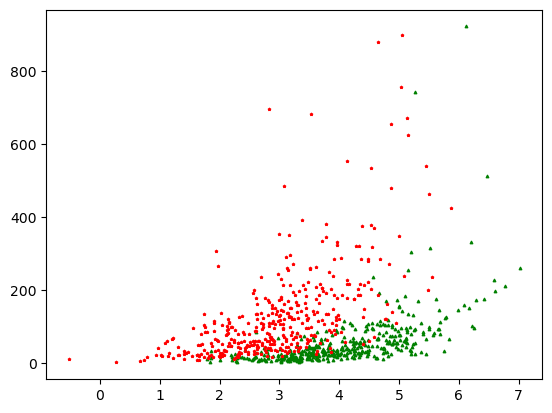

In [4]:
p_indices = np.squeeze(np.where(y_train == 1))
n_indices = np.squeeze(np.where(y_train == 0))

plt.scatter(x_train[p_indices[0],1], x_train[p_indices[0],2], color='green', marker='^', s=3)
plt.scatter(x_train[n_indices[0],1], x_train[n_indices[0],2], color='red', marker = '*', s=3)


In [53]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        
      
        def sigmoid(theta,x):
            return 1/(1+np.exp(-np.dot(x,theta)))
        
        def log_likelihood(y,y_hat):
            ll=0
            for i in range(y.shape[0]):
                ll = ll + y[i]*np.log2(y_hat[i]) + (1-y[i])*np.log2(1-y_hat[i])
            return ll

        def ll_derivative_vector(y,y_hat,x):
            return np.dot(x.T, (y-y_hat))
        
        def H(x,y):
            H = np.zeros((x.shape[1],x.shape[1]))
            rows = H.shape[0]
            cols = H.shape[1]
            for i in range(rows):
                for j in range(cols):
                    #H[i,j] = np.sum((train_labels-y_hat)*(train_X[:,i]*train_X[:,j]))
                    xixj = x[:,i]*x[:,j]
                    xixj = np.reshape(xixj, (xixj.shape[0],1))
                    H[i,j] = np.sum(-y_hat*(1-y_hat)*(xixj))
            return H
        
        def Hessian_inverse(H):
            return np.linalg.inv(H)
        

        if self.theta==None:
            print('Theta instantiation not found. Initializing as zero vector of shape: {},1'.format(x.shape[1]))
            self.theta = np.zeros((x.shape[1],1))
            
        theta = self.theta
        
        itr=0
        while True:
            y_hat = sigmoid(theta,x)
            Hessian = H(x,y) 
            temp = theta - np.dot(Hessian_inverse(Hessian), ll_derivative_vector(y,y_hat,x))
            diff = temp-theta
            print('iteration: ', itr,'\n' , diff)
            theta = temp
            itr+=1
            if (abs(diff) < self.eps).all():
                break
                
        self.theta = theta # Final Assignment
        
        
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        y_preds = 1/(1+np.exp(-np.dot(x,self.theta)))
        
        return np.where(y_preds >= 0.5, 1, 0)
        # *** END CODE HERE ***


In [54]:
clf = LogisticRegression()

In [55]:
clf.fit(x_train, y_train)

Theta instantiation not found. Initializing as zero vector of shape: 3,1
iteration:  0 
 [[-3.2043369 ]
 [ 1.15293034]
 [-0.00915559]]
iteration:  1 
 [[-1.56153467]
 [ 0.66448578]
 [-0.00940891]]
iteration:  2 
 [[-1.03303234]
 [ 0.45626445]
 [-0.00765717]]
iteration:  3 
 [[-0.41012307]
 [ 0.18092431]
 [-0.00326718]]
iteration:  4 
 [[-0.05048214]
 [ 0.02217008]
 [-0.00041781]]
iteration:  5 
 [[-6.75654169e-04]
 [ 2.97484774e-04]
 [-5.84474088e-06]]
iteration:  6 
 [[-1.24060581e-07]
 [ 5.50911268e-08]
 [-1.13040462e-09]]


In [56]:
clf.theta

array([[-6.26018491],
       [ 2.47707251],
       [-0.0299125 ]])

In [57]:
clf.eps

1e-05

In [60]:
y_preds = clf.predict(x_eval)

In [66]:
accuracy = np.sum(y_preds==y_eval)*100/y_eval.shape[0]
print('Accuracy: ', accuracy)

Accuracy:  90.0


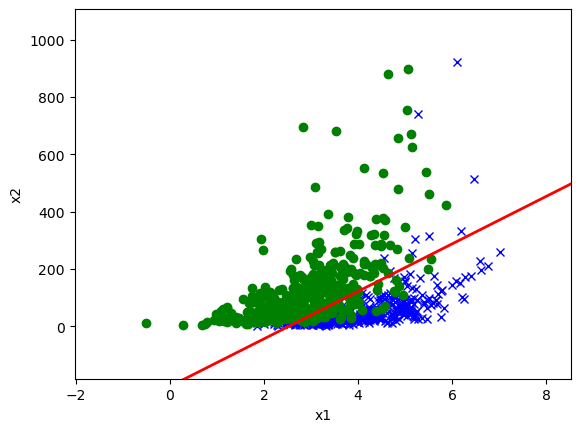

In [69]:
# convert y shape from 800,1 into shape 800

y_train = np.reshape(y_train, (y_train.shape[0],))

util.plot(x_train, y_train, clf.theta)


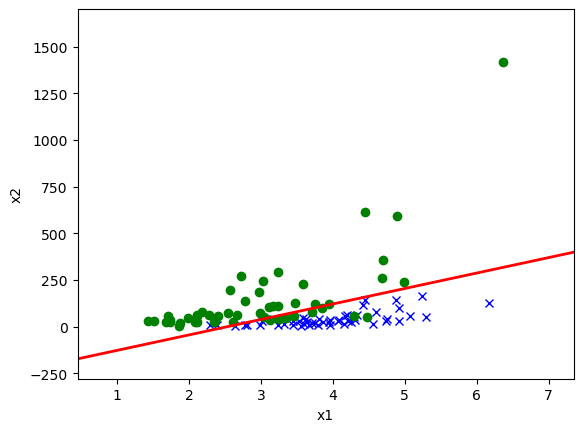

In [70]:
y_eval = np.reshape(y_eval, (y_eval.shape[0],))
util.plot(x_eval, y_eval, clf.theta)